In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\SMS Spam Dataset.csv")
df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [2]:
df.shape

(5574, 2)

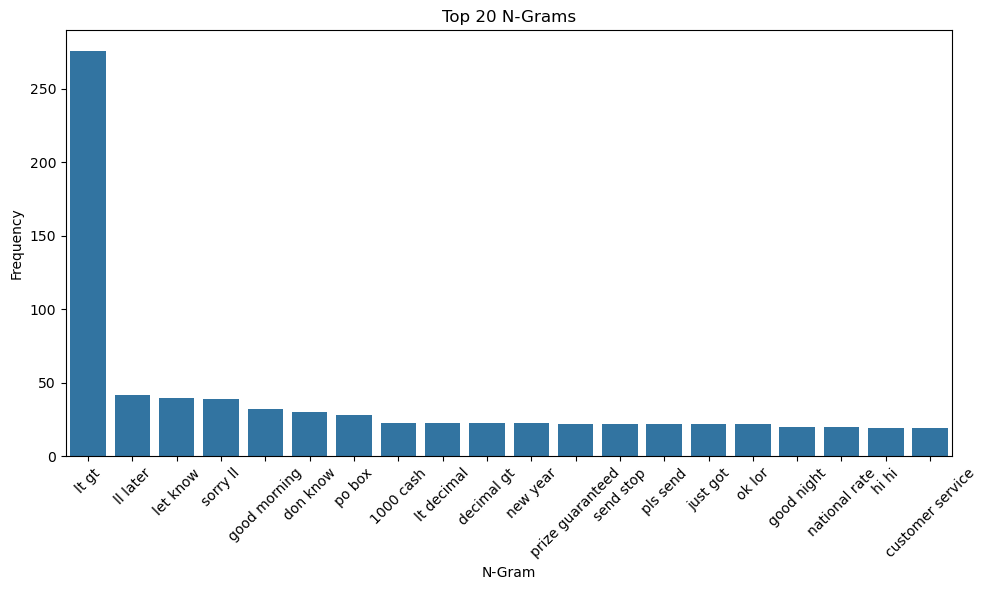

In [3]:
#N-Gram Analysis
#This code performs top N-grams analysis on text data using the CountVectorizer from scikit-learn. N-grams are contiguous sequences of n items from a given text, where items can be characters, syllables, or words. In this case, we’re looking at bi-grams (2-grams), which are pairs of words occurring together in the text.

#The code first creates a CountVectorizer object with a specified ngram_range of (2, 2), meaning it will consider only bi-grams. It also removes English stop words to exclude common words like “and”, “the”, etc.

#Then, it transforms the text data into a matrix of token counts using the fit_transform method of CountVectorizer. It calculates the sum of occurrences of each bi-gram in the text and sorts them in descending order.


#Finally, it visualizes the top 20 bi-grams using a bar plot, where the x-axis represents the bi-grams and the y-axis represents their frequencies. The purpose is to identify the most frequent pairs of words occurring together in the text, providing insights into the language patterns and potentially revealing important phrases or expressions.

# Top N-Grams Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = cv.fit_transform(df['sms'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
top_ngrams = [word[0] for word in words_freq]
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in words_freq], y=[word[1] for word in words_freq])
plt.title('Top 20 N-Grams')
plt.xlabel('N-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

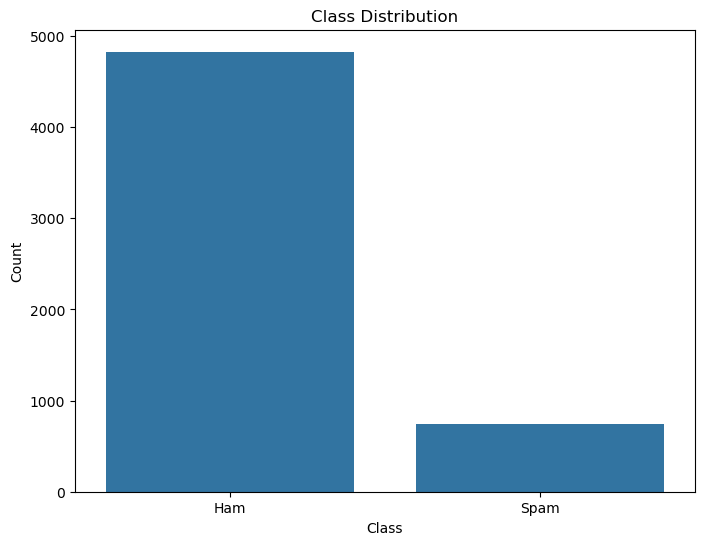

In [4]:
#Classes Distribution
# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

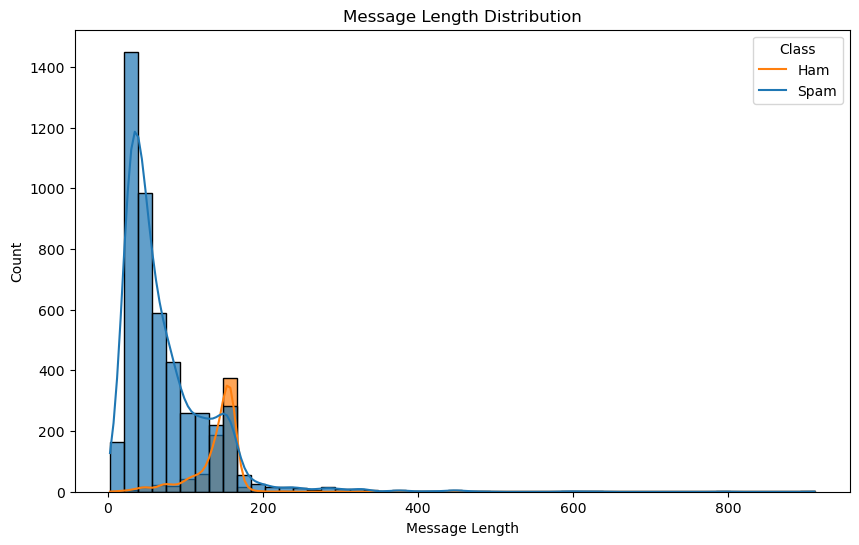

In [5]:
#Messages Length Distribution
# Plot message length distribution
df['message_length'] = df['sms'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, alpha=0.7)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam'])
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


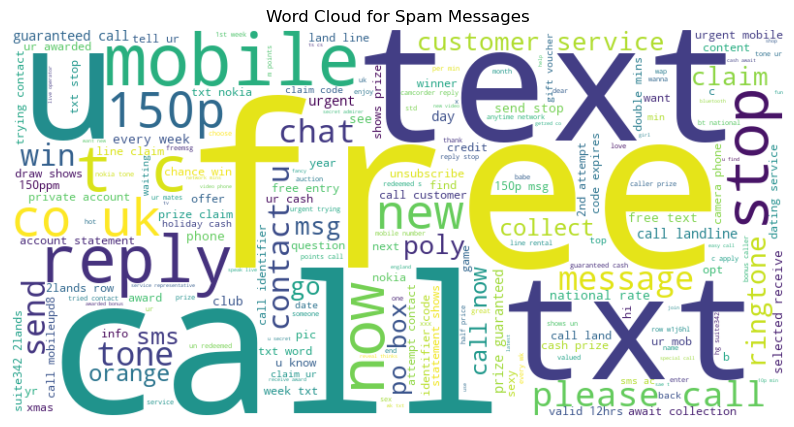

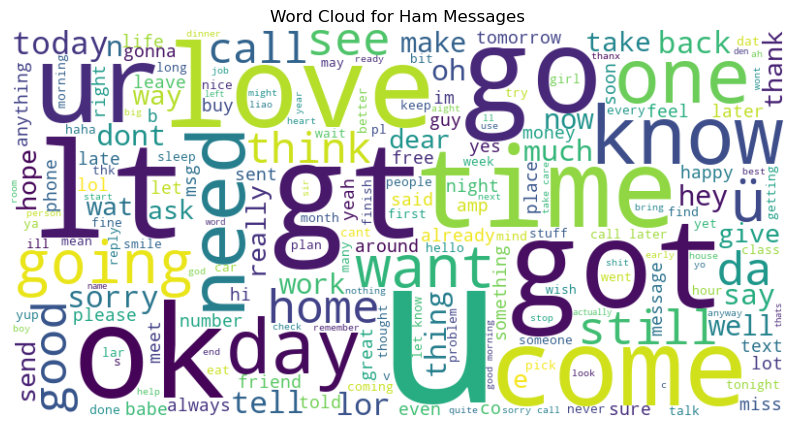

In [6]:
#Word Clouds for both spam and hem messages
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from spam and ham messages
spam_messages = df[df['label'] == 1]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
ham_messages = df[df['label'] == 0]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Generate word cloud for spam messages
plt.figure(figsize=(10, 8))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Generate word cloud for ham messages
plt.figure(figsize=(10, 8))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#cleaning text
import re #import regular expression to deal with textual data
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_text(text):
   # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Initialize Porter Stemmer
    stemmer = PorterStemmer()
    
    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a single string
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text



In [24]:
df['clean_text'] = df['sms'].apply(lambda x: clean_text(x))

In [25]:
df.head()

,sms,label,message_length,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,112,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,0,50,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,nah dont think goe usf live around though


In [30]:
df['label'].value_counts()  #biased as 1 values are more

label
0    4827
1     747
Name: count, dtype: int64

In [27]:
#data balance
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame containing the data
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

# Initialize the resampling technique
oversampler = RandomOverSampler()

# Perform the resampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame for the balanced dataset
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()

label
0    4827
1    4827
Name: count, dtype: int64

In [31]:
#Train Test Split and TFIDF Vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['clean_text'], df_balanced['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
#model building and ensemble learning 
#random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[992   2]
 [  0 937]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [34]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_lr)
print("\nLogistic Regression - Classification Report:")
print(class_report_lr)

Logistic Regression - Confusion Matrix:
[[983  11]
 [ 11 926]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       994
           1       0.99      0.99      0.99       937

    accuracy                           0.99      1931
   macro avg       0.99      0.99      0.99      1931
weighted avg       0.99      0.99      0.99      1931



In [35]:
#support vector machine
from sklearn.svm import SVC

# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM - Classification Report:")
print(class_report_svm)

SVM - Confusion Matrix:
[[991   3]
 [  5 932]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           1       1.00      0.99      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [37]:
#ensemble learning
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Define the ensemble classifier with SVM
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' voting for a majority rule

# Fit the ensemble classifier on TF-IDF features
ensemble_classifier.fit(X_train_tfidf, y_train)

# Predictions using ensemble classifier
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for ensemble classifier
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble)

print("Ensemble Classifier - Confusion Matrix:")
print(conf_matrix_ensemble)
print("\nEnsemble Classifier - Classification Report:")
print(class_report_ensemble)


Ensemble Classifier - Confusion Matrix:
[[991   3]
 [  5 932]]

Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           1       1.00      0.99      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [45]:
#Save and Load Model and TFIDF Vectorizer

import pickle 
pickle.dump(rf_classifier, open("modell.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf.pkl",'wb'))
import pickle

# Load the Random Forest model
with open("modell.pkl", 'rb') as file:
    rf_classifier = pickle.load(file)

# Load the TF-IDF vectorizer
with open("tfidf.pkl", 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [41]:
#detection system
def predict_fake_or_real(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    
    # Transform the cleaned text using the TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([cleaned_text])
    
    # Use the trained classifier to predict
    prediction = rf_classifier.predict(text_tfidf)
    
    # Map prediction to label
    label = "fake" if prediction[0] == 1 else "real"
    
    return label
# Example usage:
input_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: real


In [42]:
# Example usage:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"
prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake


In [43]:
# Example usage:
input_text = 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16'

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake
